# Mushroom Dataset Overview

This dataset is a cleaned version of the original Mushroom Dataset for binary classification, available at the UCI Library.

## Dataset Information

- **Number of Columns:** 9

### Columns

1. **Cap Diameter** - The diameter of the mushroom cap.
2. **Cap Shape** - The shape of the mushroom cap.
3. **Gill Attachment** - How the gills are attached to the stem.
4. **Gill Color** - The color of the gills.
5. **Stem Height** - The height of the stem.
6. **Stem Width** - The width of the stem.
7. **Stem Color** - The color of the stem.
8. **Season** - The season in which the mushroom was found.
9. **Target Class** - Indicates if the mushroom is edible or poisonous.
   - **Values:** 
     - `0` - Edible
     - `1` - Poisonous

## Link to Dataset
[Access the Mushroom Dataset](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset)


# 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [8]:
mushroom_df = pd.read_csv('./data/mushroom_cleaned.csv')
mushroom_df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [9]:
# Reducing the dataset size to speed up model training and hyperparameter tuning,
# as the original dataset (shape: 54035, 9) is taking too long to process during GridSearchCV.

mushroom_df = mushroom_df.sample(frac=0.05, random_state=42)

In [10]:
mushroom_df.shape

(2702, 9)

In [11]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2702 entries, 14085 to 3168
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     2702 non-null   int64  
 1   cap-shape        2702 non-null   int64  
 2   gill-attachment  2702 non-null   int64  
 3   gill-color       2702 non-null   int64  
 4   stem-height      2702 non-null   float64
 5   stem-width       2702 non-null   int64  
 6   stem-color       2702 non-null   int64  
 7   season           2702 non-null   float64
 8   class            2702 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 211.1 KB


In [12]:
mushroom_df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000
mean,565.940785,4.007772,2.156181,7.274611,0.750989,1049.503331,8.487787,0.955816,0.544412
std,355.135107,2.164542,2.255611,3.225812,0.640945,782.218728,3.271674,0.310441,0.498116
min,7.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.250000,2.000000,0.000000,5.000000,0.270146,418.250000,6.000000,0.888450,0.000000
50%,528.000000,5.000000,1.000000,7.000000,0.580932,914.500000,11.000000,0.943195,1.000000
75%,783.000000,6.000000,4.000000,10.000000,1.061182,1526.000000,11.000000,0.943195,1.000000
max,1890.000000,6.000000,6.000000,11.000000,3.811446,3557.000000,12.000000,1.804273,1.000000


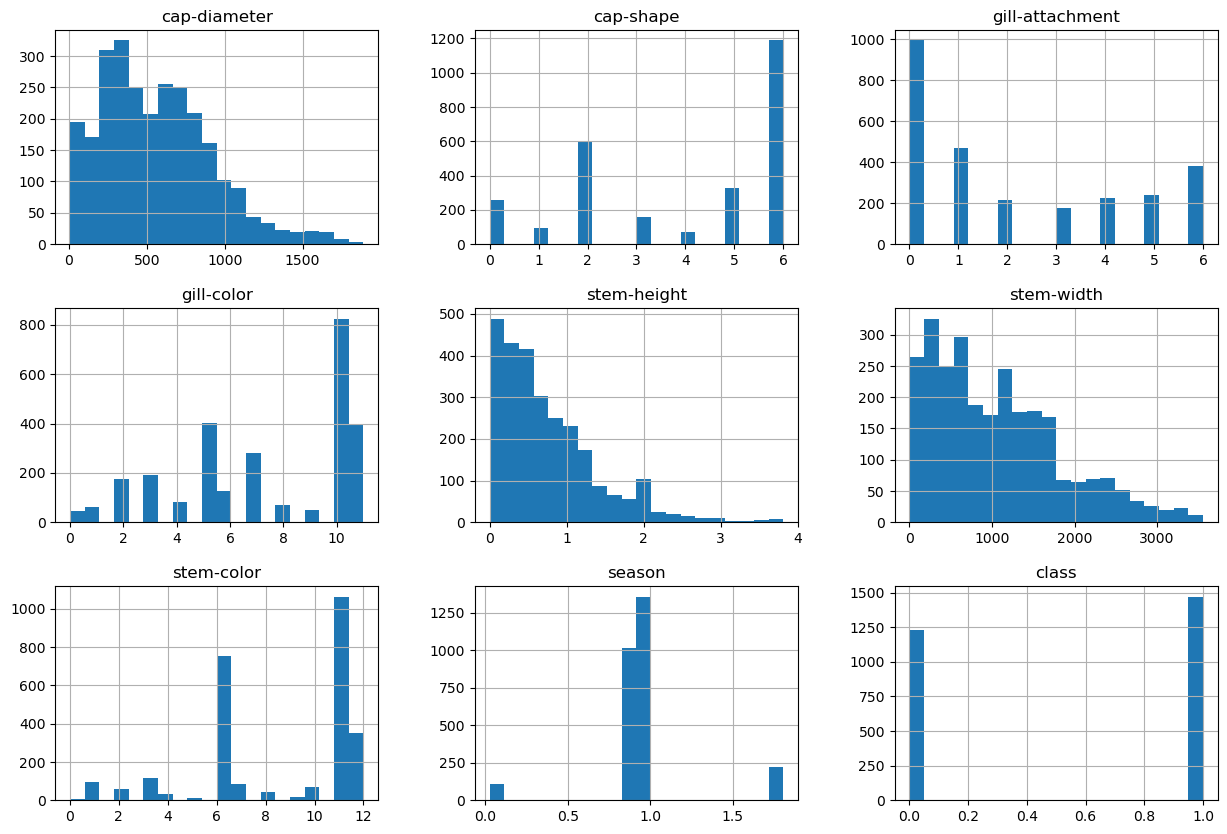

In [13]:
mushroom_df.hist(figsize=(15,10), bins=20)
plt.show()

## General Observations

- **Skewed Distributions:** Many of the variables exhibit skewed distributions, suggesting that the data may not be normally distributed, which could impact the choice of statistical methods.
- **Discrete Nature:** The data appears to be discrete for most variables, likely representing categorical or ordinal data.
- **Large Sample Size:** The histograms indicate a large number of observations, which is good for statistical analysis.

## Specific Observations

- **Cap Diameter:** The distribution is right-skewed, indicating that most mushrooms have smaller cap diameters.
- **Cap Shape:** The distribution is relatively uniform, with no dominant shape.
- **Gill Attachment:** The distribution is concentrated around certain values, indicating that some attachment types are more common.
- **Gill Color:** The distribution is also concentrated around certain values, suggesting that specific gill colors are more prevalent.
- **Stem Height:** The distribution is right-skewed, with most mushrooms having shorter stems.
- **Stem Width:** Similar to stem height, the distribution is right-skewed.
- **Stem Color:** The distribution is concentrated around certain values, indicating specific stem colors are more common.
- **Season:** The distribution is relatively uniform, with no dominant season.
- **Class:** The distribution is bimodal, indicating that there are two distinct classes of mushrooms.

## Potential Insights

- **Mushroom Classification:** The bimodal distribution of the "class" variable suggests that there are two distinct types of mushrooms in the dataset. Further analysis could focus on identifying the characteristics that differentiate these two classes.
- **Mushroom Growth Patterns:** The distributions of variables like "cap diameter," "stem height," and "stem width" could provide insights into the growth patterns of different mushroom species.
- **Seasonal Variation:** The distribution of the "season" variable could reveal seasonal patterns in mushroom abundance or types.


In [14]:
#  Missing values

mushroom_df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

<Axes: >

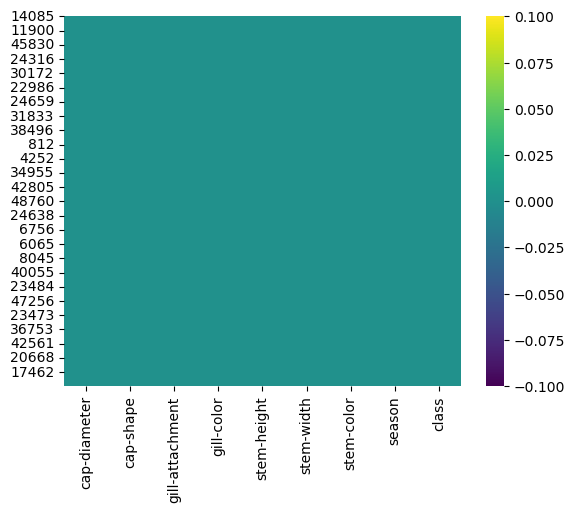

In [15]:
sns.heatmap(mushroom_df.isnull(), cmap='viridis')

## Null Values Assessment

There are no null values in the data.


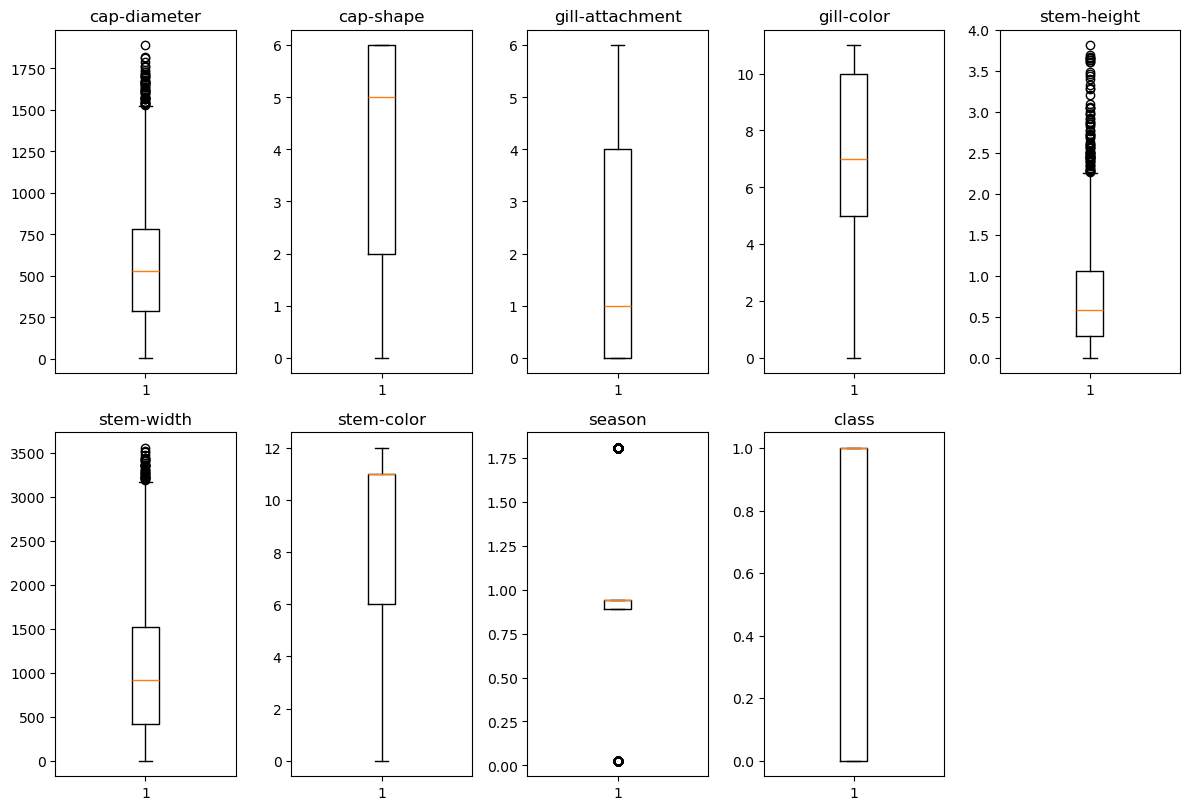

In [16]:
# Outliers

plt.figure(figsize=(12,12))

for i, column in enumerate(mushroom_df.columns):
    plt.subplot(3, 5, i+1)
    plt.boxplot(mushroom_df[column])
    plt.title(f'{column}')
    
plt.tight_layout()
plt.show()

## Outlier Assessment

After reviewing the dataset, I found that there are no outliers. The data points represent real differences in happiness across countries. Therefore, all the data is valid, and no changes are needed. This means we can use the entire dataset for analysis without removing any data points.

# 2

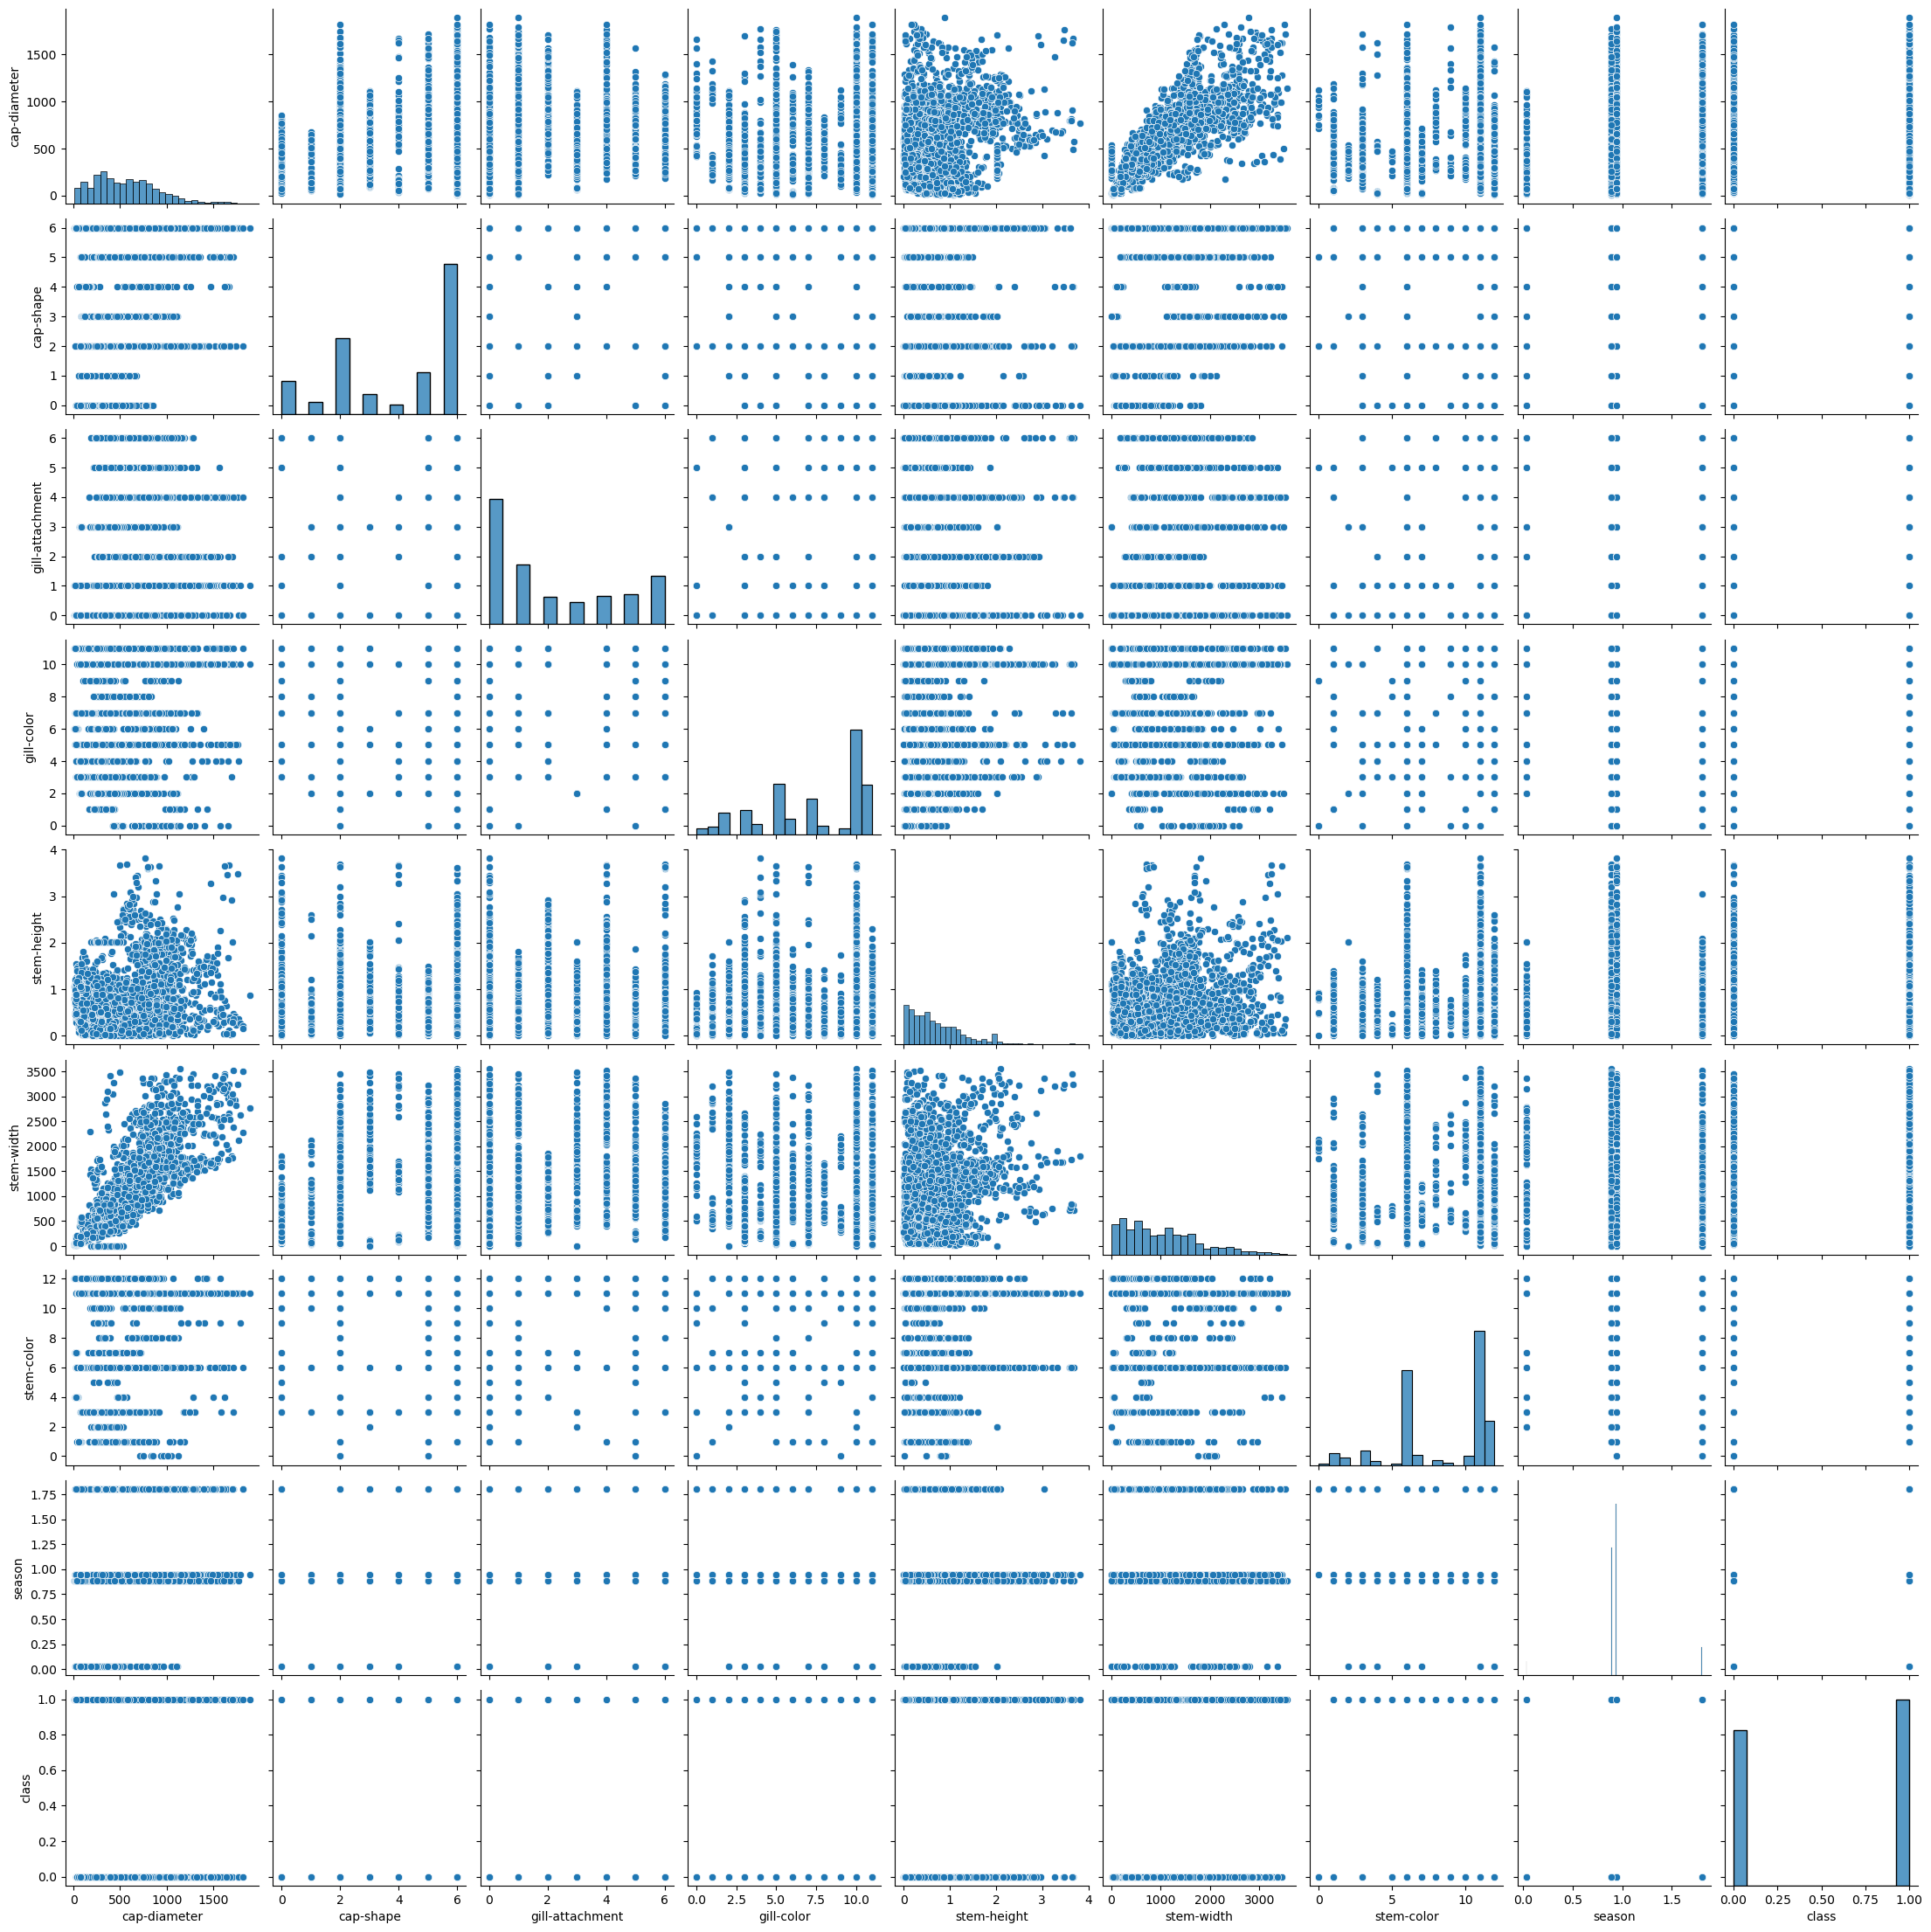

In [17]:
sns.pairplot(mushroom_df)
plt.show()

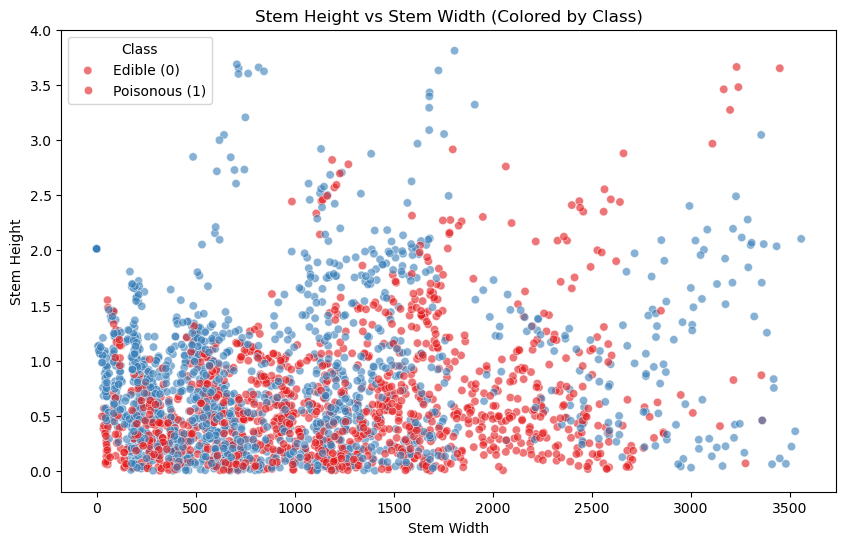

In [18]:
# Stem Height vs. Stem Width
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stem-width', y='stem-height', hue='class', data=mushroom_df, palette='Set1', alpha=0.6)
plt.title('Stem Height vs Stem Width (Colored by Class)')
plt.xlabel('Stem Width')
plt.ylabel('Stem Height')
plt.legend(title='Class', labels=['Edible (0)', 'Poisonous (1)'])
plt.show()

Insights:

1. Overlap: There is a significant overlap between the edible and poisonous mushrooms based on stem height and width. This indicates that these features alone are not sufficient for accurate classification.
2. Clustering: There are noticeable clusters of points for both edible and poisonous mushrooms. This suggests that certain combinations of stem height and width might be more indicative of one class over the other.

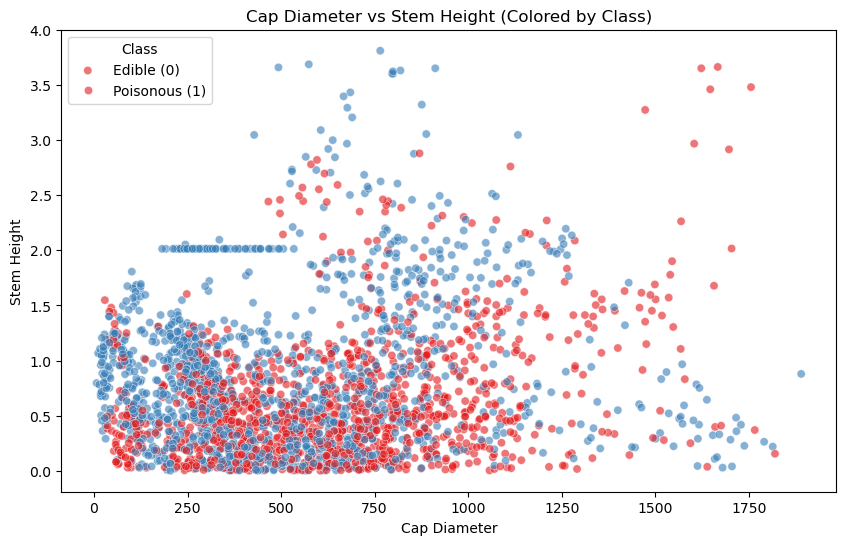

In [19]:
# Cap Diameter vs. Stem Height
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cap-diameter', y='stem-height', hue='class', data=mushroom_df, palette='Set1', alpha=0.6)
plt.title('Cap Diameter vs Stem Height (Colored by Class)')
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Height')
plt.legend(title='Class', labels=['Edible (0)', 'Poisonous (1)'])
plt.show()

Insights:

1. Overlap: There is a significant overlap between the edible and poisonous mushrooms based on cap diameter and stem height. This indicates that these features alone are not sufficient for accurate classification.
2. Clustering: There are noticeable clusters of points for both edible and poisonous mushrooms, especially in the lower cap diameter and stem height range.

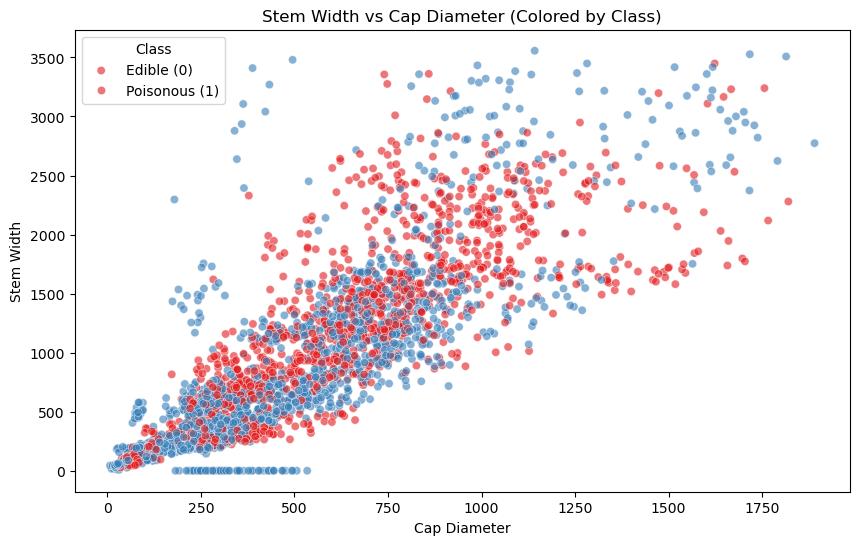

In [20]:
# Stem Width vs. Cap Diameter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cap-diameter', y='stem-width', hue='class', data=mushroom_df, palette='Set1', alpha=0.6)
plt.title('Stem Width vs Cap Diameter (Colored by Class)')
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Width')
plt.legend(title='Class', labels=['Edible (0)', 'Poisonous (1)'])
plt.show()

Insights:

1. Overlap: There is a significant overlap between the edible and poisonous mushrooms based on stem width and cap diameter. This indicates that these features alone are not sufficient for accurate classification.
2. Clustering: There are noticeable clusters of points for both edible and poisonous mushrooms. However, the clusters are not well-separated, making it difficult to distinguish between the two classes based on these features alone.

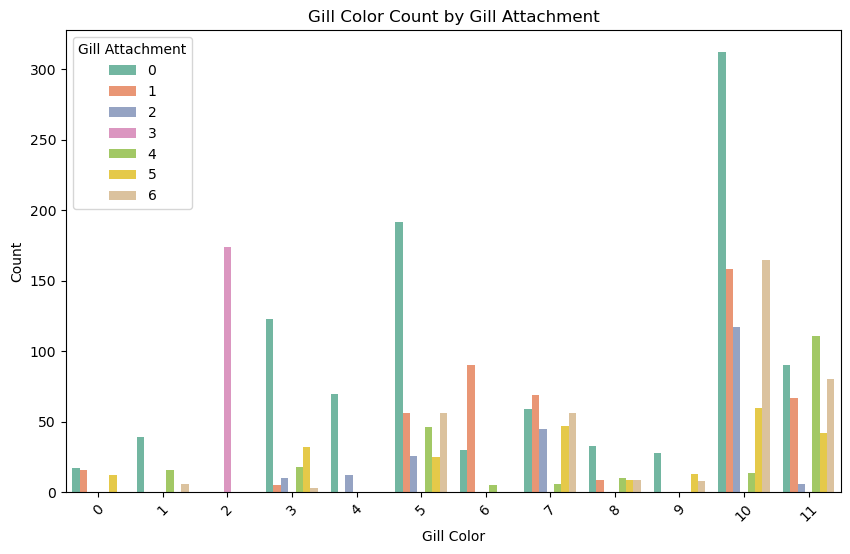

In [21]:
# 3. Gill Attachment vs Gill Color
plt.figure(figsize=(10, 6))
sns.countplot(data=mushroom_df, x='gill-color', hue='gill-attachment', palette='Set2')
plt.title('Gill Color Count by Gill Attachment')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.legend(title='Gill Attachment')
plt.xticks(rotation=45)
plt.show()

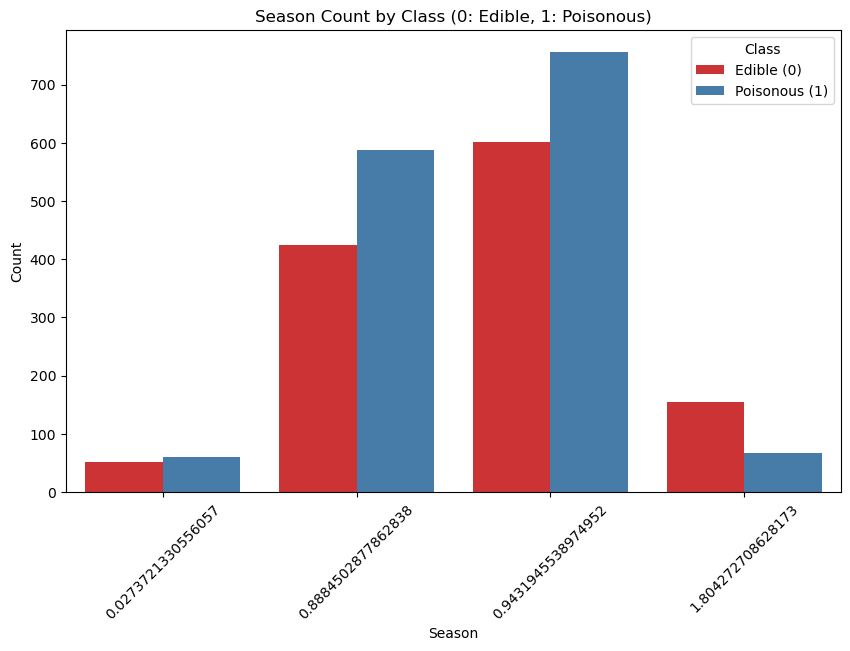

In [22]:
# 4. Season vs Class
plt.figure(figsize=(10, 6))
sns.countplot(data=mushroom_df, x='season', hue='class', palette='Set1')
plt.title('Season Count by Class (0: Edible, 1: Poisonous)')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible (0)', 'Poisonous (1)'])
plt.xticks(rotation=45)
plt.show()

Insights:
1. Edible Mushrooms: The count of edible mushrooms is significantly higher across all seasons compared to poisonous mushrooms.
2. Seasonality: There seems to be some seasonality in the occurrence of both edible and poisonous mushrooms. The highest counts are observed in seasons 0.888 and 1.804.
3. Dominant Season: Season 0.888 appears to be the dominant season for both edible and poisonous mushrooms.

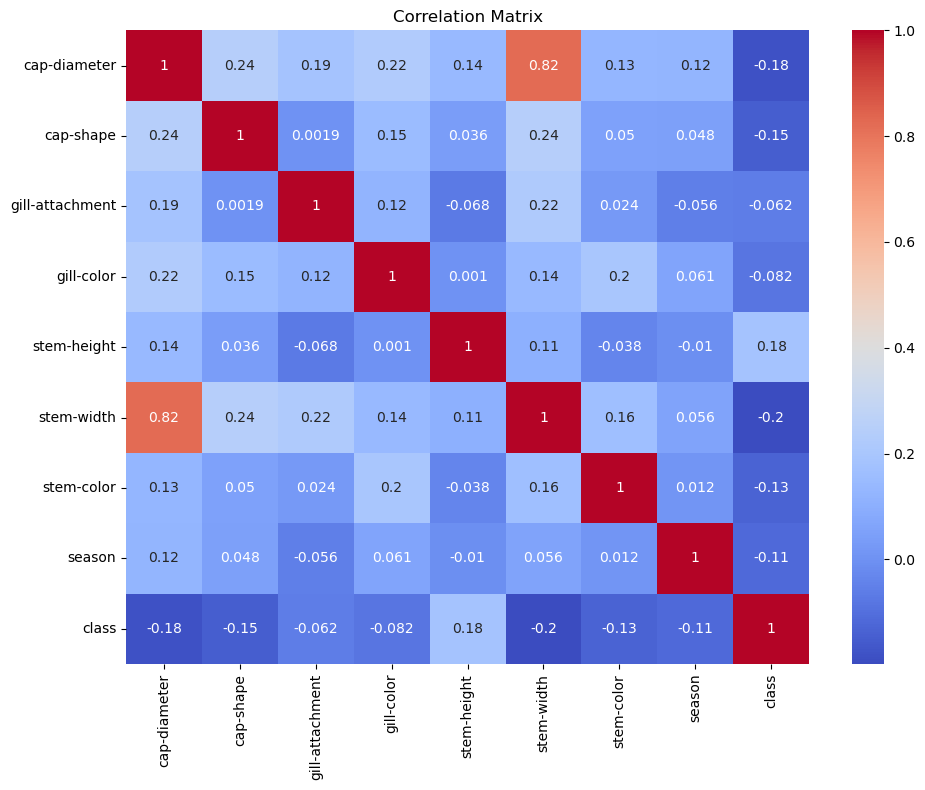

In [23]:
# Correlation between features

correlation_matrix = mushroom_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Mushroom Features Correlation Analysis

## Strong Positive Correlations
- **Cap Diameter and Stem Width**: 
  - There is a strong positive correlation between cap diameter and stem width. 
  - This indicates that mushrooms with larger cap diameters tend to have wider stems.

## Moderate Positive Correlations
- **Cap Diameter and Cap Shape**: 
  - There is a moderate positive correlation between cap diameter and cap shape. 
  - This suggests that certain cap shapes might be more associated with larger cap diameters.
  
- **Gill Attachment and Stem Width**: 
  - There is a moderate positive correlation between gill attachment and stem width. 
  - This indicates that certain gill attachment types might be more associated with wider stems.

## Weak Correlations
- Most variables have weak or negligible correlations with the class variable. 
- This suggests that no single feature is strongly predictive of whether a mushroom is edible or poisonous.

## Overall Insights
- The correlation matrix suggests that several features are moderately correlated with each other, but the relationships are not very strong.
- To accurately classify mushrooms as edible or poisonous, it will likely be necessary to consider multiple features and potentially more complex models.


# 3

In [24]:
mushroom_df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [26]:
# Feature Scaling

scale_cols = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season']

min_max_scaler = MinMaxScaler()
mushroom_df[scale_cols] = min_max_scaler.fit_transform(mushroom_df[scale_cols])

In [27]:
X = mushroom_df[scale_cols]  # Features
y = mushroom_df['class']     # Target variable

# First split: Train + Validate and Test (80% train + validate, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: Train and Validate (75% train, 25% validate from the remaining 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Display the shapes of each set to verify the split
print("Training Data Shape (X):", X_train.shape, "y:", y_train.shape)
print("Validation Data Shape (X):", X_val.shape, "y:", y_val.shape)
print("Testing Data Shape (X):", X_test.shape, "y:", y_test.shape)

Training Data Shape (X): (1620, 8) y: (1620,)
Validation Data Shape (X): (541, 8) y: (541,)
Testing Data Shape (X): (541, 8) y: (541,)


# 4

In [28]:
# A. Multinomial Logistic Regression (Softmax Regression)

param_grid = {
    'C': [0.1, 1, 10, 100],                # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'saga'], # Solver for optimization
    'max_iter': [100, 200, 500]             # Maximum number of iterations
}

# Initialize the logistic regression model for multinomial classification
logistic_model = LogisticRegression(multi_class='multinomial')

# Set up GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}


### Results Interpretation

1. **C = 0.1** (Regularization Strength):
   - **Impact**: The low `C` value indicates strong regularization, helping prevent overfitting. This setting suggests that the model is likely to generalize well on unseen data, even if it sacrifices some accuracy on the training set. With this choice, the model might be less sensitive to noise or irrelevant features, balancing out complexity for better generalization.

2. **solver = 'lbfgs'**:
   - **Impact**: The `lbfgs` solver is a good choice here as it is efficient with moderate-sized datasets. It tends to converge relatively quickly and can handle multiclass classification tasks effectively. Given this model setup, `lbfgs` likely allowed the algorithm to reach a solution within the iteration limit without requiring the highest compute power.

3. **max_iter = 100**:
   - **Impact**: Setting `max_iter` to 100 indicates that the model reached sufficient convergence within 100 iterations. This is typically a sign of well-selected regularization (`C=0.1`), as a lower regularization strength would likely have required more iterations to converge. Lower iterations also reduced computation time, making the training process more efficient.

### Overall Impact on Model Performance
These settings—particularly the combination of low regularization and the `lbfgs` solver—indicate a well-balanced model that is not overly complex but should generalize well to new data. The model’s focus on simplicity with stronger regularization (lower `C`) and fewer iterations could mean it sacrifices some accuracy for robustness, which might be beneficial for applications where avoiding overfitting is crucial.


In [29]:
# Define a function to calculate and display metrics
def evaluate_model(model, X, y, dataset_name="Dataset"):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions, average='weighted')
    recall = recall_score(y, predictions, average='weighted')
    f1 = f1_score(y, predictions, average='weighted')
    print(f"{dataset_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y, predictions))

In [30]:
best_model_soft_max = grid_search.best_estimator_

# Evaluate on training data
evaluate_model(best_model_soft_max, X_train, y_train, "Training Data")

Training Data Performance:
Accuracy: 0.6556
Precision: 0.6543
Recall: 0.6556
F1 Score: 0.6545

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61       738
           1       0.67      0.71      0.69       882

    accuracy                           0.66      1620
   macro avg       0.65      0.65      0.65      1620
weighted avg       0.65      0.66      0.65      1620



In [31]:
# Evaluate on validation data
evaluate_model(best_model_soft_max, X_val, y_val, "Validation Data")

Validation Data Performance:
Accuracy: 0.6248
Precision: 0.6226
Recall: 0.6248
F1 Score: 0.6216

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.53      0.56       247
           1       0.64      0.71      0.67       294

    accuracy                           0.62       541
   macro avg       0.62      0.62      0.62       541
weighted avg       0.62      0.62      0.62       541



In [32]:
# Evaluate on test data
evaluate_model(best_model_soft_max, X_test, y_test, "Test Data")

Test Data Performance:
Accuracy: 0.6580
Precision: 0.6565
Recall: 0.6580
F1 Score: 0.6551

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60       246
           1       0.67      0.74      0.70       295

    accuracy                           0.66       541
   macro avg       0.66      0.65      0.65       541
weighted avg       0.66      0.66      0.66       541



In [34]:
# B. Support Vector Machine

param_grid = {
    'C': [0.1, 1, 10, 100],                      
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'degree': [2, 3, 4],                        
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  
}

# Initialize the SVM model
svm_model = SVC(probability=True)

# Set up GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_svm.fit(X_train, y_train.values.ravel())  # Ensure y is 1D

# Best hyperparameters
print("Best Hyperparameters:", grid_search_svm.best_params_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Hyperparameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


## Hyperparameters and Their Impact

1. **C: 100**
   - A high value indicates that the model focuses on minimizing training errors, which can improve accuracy but may lead to overfitting.

2. **Kernel: rbf**
   - The Radial Basis Function kernel captures complex, non-linear relationships in the data, providing flexibility in the decision boundary.

3. **Degree: 2**
   - This degree is used for the polynomial kernel; it indicates a quadratic approach to separating classes, helping to model non-linear data effectively without excessive complexity.

4. **Gamma: scale**
   - Setting gamma to `scale` adjusts it based on the number of features, allowing for better generalization by defining how far the influence of a single training example reaches.

## Conclusion

The combination of these hyperparameters resulted in the best accuracy for your SVM model, effectively balancing the trade-off between fitting the training data and maintaining generalization to unseen data.


In [38]:
best_model_svm = grid_search_svm.best_estimator_

# Evaluate on training data
evaluate_model(best_model_svm, X_train, y_train, "Training Data")

Training Data Performance:
Accuracy: 0.9099
Precision: 0.9098
Recall: 0.9099
F1 Score: 0.9099

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       738
           1       0.92      0.92      0.92       882

    accuracy                           0.91      1620
   macro avg       0.91      0.91      0.91      1620
weighted avg       0.91      0.91      0.91      1620



In [39]:
# Evaluate on validation data
evaluate_model(best_model_svm, X_val, y_val, "Validation Data")

Validation Data Performance:
Accuracy: 0.8743
Precision: 0.8746
Recall: 0.8743
F1 Score: 0.8740

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       247
           1       0.87      0.90      0.89       294

    accuracy                           0.87       541
   macro avg       0.88      0.87      0.87       541
weighted avg       0.87      0.87      0.87       541



In [40]:
# Evaluate on test data
evaluate_model(best_model_svm, X_test, y_test, "Test Data")

Test Data Performance:
Accuracy: 0.8965
Precision: 0.8976
Recall: 0.8965
F1 Score: 0.8961

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       246
           1       0.88      0.94      0.91       295

    accuracy                           0.90       541
   macro avg       0.90      0.89      0.89       541
weighted avg       0.90      0.90      0.90       541



In [41]:
# C. Random Forest Classifier

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train.values.ravel())  # Ensure y is 1D

# Best hyperparameters
print("Best Hyperparameters:", grid_search_rf.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Hyperparameters and Their Impact

1. **n_estimators: 200**
   - This parameter defines the number of trees in the forest. A higher value (like 200) generally improves model performance and stability by averaging predictions across more trees, reducing variance. However, it may also increase training time.

2. **max_depth: None**
   - Allowing trees to grow to their full depth enables the model to capture complex patterns in the data. While this can enhance performance on the training data, it may increase the risk of overfitting, especially if the dataset is noisy.

3. **min_samples_split: 2**
   - This indicates the minimum number of samples required to split an internal node. Setting it to 2 allows for more splits and potentially more complex trees, which can improve learning but may also lead to overfitting.

4. **min_samples_leaf: 1**
   - This defines the minimum number of samples that must be present at a leaf node. With a value of 1, the model can create leaf nodes that perfectly fit the training data, which can capture nuances but might also contribute to overfitting.

## Conclusion

The selected hyperparameters indicate a model designed to maximize its learning capacity and accuracy on the training data, making it well-suited for capturing intricate relationships. However, it's essential to monitor performance on validation or test data to ensure that the model generalizes well to unseen data and does not overfit.


In [42]:
best_model_rf = grid_search_rf.best_estimator_

# Evaluate on training data
evaluate_model(best_model_rf, X_train, y_train, "Training Data")

Training Data Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       738
           1       1.00      1.00      1.00       882

    accuracy                           1.00      1620
   macro avg       1.00      1.00      1.00      1620
weighted avg       1.00      1.00      1.00      1620



In [43]:
# Evaluate on validation data
evaluate_model(best_model_rf, X_val, y_val, "Validation Data")

Validation Data Performance:
Accuracy: 0.9445
Precision: 0.9452
Recall: 0.9445
F1 Score: 0.9444

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       247
           1       0.93      0.97      0.95       294

    accuracy                           0.94       541
   macro avg       0.95      0.94      0.94       541
weighted avg       0.95      0.94      0.94       541



In [44]:
# Evaluate on test data
evaluate_model(best_model_rf, X_test, y_test, "Test Data")

Test Data Performance:
Accuracy: 0.9519
Precision: 0.9533
Recall: 0.9519
F1 Score: 0.9518

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       246
           1       0.93      0.98      0.96       295

    accuracy                           0.95       541
   macro avg       0.96      0.95      0.95       541
weighted avg       0.95      0.95      0.95       541



# 5

In [45]:
# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic', best_model_soft_max),
    ('svm', best_model_svm),
    ('random_forest', best_model_rf)],
    voting='soft'  # Use soft voting to consider predicted probabilities
)

# Fit the ensemble model on the training data
voting_clf.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1, multi_class='multinomial',
                                                 solver='newton-cg')),
                             ('svm', SVC(C=100, degree=2, probability=True)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [46]:
# Evaluate on training data
evaluate_model(voting_clf, X_train, y_train.values.ravel(), dataset_name="Training Set")

Training Set Performance:
Accuracy: 0.9735
Precision: 0.9735
Recall: 0.9735
F1 Score: 0.9735

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       738
           1       0.97      0.98      0.98       882

    accuracy                           0.97      1620
   macro avg       0.97      0.97      0.97      1620
weighted avg       0.97      0.97      0.97      1620



In [47]:
# Evaluate on validation data
evaluate_model(voting_clf, X_val, y_val, "Validation Data")

Validation Data Performance:
Accuracy: 0.8946
Precision: 0.8956
Recall: 0.8946
F1 Score: 0.8942

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       247
           1       0.88      0.93      0.91       294

    accuracy                           0.89       541
   macro avg       0.90      0.89      0.89       541
weighted avg       0.90      0.89      0.89       541



In [48]:
# Evaluate on test data
evaluate_model(voting_clf, X_test, y_test, "Test Data")

Test Data Performance:
Accuracy: 0.9113
Precision: 0.9120
Recall: 0.9113
F1 Score: 0.9110

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       246
           1       0.90      0.94      0.92       295

    accuracy                           0.91       541
   macro avg       0.91      0.91      0.91       541
weighted avg       0.91      0.91      0.91       541



## Model Performance Summary

| Model                         | Data Set         | Accuracy | Precision | Recall | F1 Score | Support |
|-------------------------------|------------------|----------|-----------|--------|----------|---------|
| Multinomial Logistic Regression| Training         | 0.6556   | 0.6543    | 0.6556 | 0.6545   | 1620    |
|                               | Validation       | 0.6248   | 0.6226    | 0.6248 | 0.6216   | 541     |
|                               | Test             | 0.6580   | 0.6565    | 0.6580 | 0.6551   | 541     |
| Support Vector Machine        | Training         | 0.9099   | 0.9098    | 0.9099 | 0.9099   | 1620    |
|                               | Validation       | 0.8743   | 0.8746    | 0.8743 | 0.8740   | 541     |
|                               | Test             | 0.8965   | 0.8976    | 0.8965 | 0.8961   | 541     |
| Random Forest Classifier      | Training         | 1.0000   | 1.0000    | 1.0000 | 1.0000   | 1620    |
|                               | Validation       | 0.9445   | 0.9452    | 0.9445 | 0.9444   | 541     |
|                               | Test             | 0.9519   | 0.9533    | 0.9519 | 0.9518   | 541     |
| Voting Classifier (Soft)     | Training         | 0.9735   | 0.9735    | 0.9735 | 0.9735   | 1620    |
|                               | Validation       | 0.8946   | 0.8956    | 0.8946 | 0.8942   | 541     |
|                               | Test             | 0.9113   | 0.9120    | 0.9113 | 0.9110   | 541     |

## Model Performance Analysis Summary

## Training Performance
- **Multinomial Logistic Regression:** Low accuracy (65.56%), indicating it struggles to capture underlying patterns in the data.
- **Support Vector Machine (SVM):** High accuracy (90.99%), demonstrating effective learning of class separation.

- **Random Forest Classifier:** Perfect accuracy (100.00%), but this raises concerns about overfitting.
- **Voting Classifier (Soft):** Strong accuracy (97.35%), indicating robust pattern recognition by combining models.

## Validation Performance
- **Multinomial Logistic Regression:** Significant drop in accuracy (62.48%), showing poor generalization to unseen data.
- **Support Vector Machine (SVM):** Moderate accuracy (87.43%), reflecting some challenges with unseen examples.

- **Random Forest Classifier:** Good validation accuracy (94.45%), but still hints at potential overfitting.
- **Voting Classifier (Soft):** Maintained solid performance (89.46%), suggesting better generalization across various data points.

## Testing Performance
- **Multinomial Logistic Regression:** Testing accuracy (65.80%) aligns with validation, confirming its unsuitability.
- **Support Vector Machine (SVM):** Accuracy (89.65%) indicates good predictive capability but shows room for improvement.

- **Random Forest Classifier:** Strong test accuracy (95.19%), but high training accuracy raises overfitting concerns.
- **Voting Classifier (Soft):** Achieved good accuracy (91.13%), confirming its effectiveness in handling diverse data.

## Class-Specific Performance
- **Multinomial Logistic Regression:** Poor precision and recall, struggling to distinguish between classes effectively.
- **Support Vector Machine (SVM):** High precision and recall for both classes, indicating balanced performance.

- **Random Forest Classifier:** Excellent performance in training but struggles with class 0 recall in validation/testing.
- **Voting Classifier (Soft):** Balanced precision and recall across classes, showcasing robust identification of true positives.

## Conclusion
The **Voting Classifier** is the best-performing model in this analysis, offering superior accuracy and robustness across various datasets. Its capability to integrate multiple model predictions enhances its reliability, making it a solid choice for applications requiring high predictive performance. 

The ensemble approach mitigates the weaknesses of individual classifiers, leading to more balanced results. Conversely, despite the Random Forest Classifier's high training accuracy, its tendency to overfit makes it less desirable in this context. Therefore, for future applications and predictions, utilizing the Voting Classifier is recommended due to its consistent performance and accuracy.
